# LCA of Bitcoin (attributional model)

Initial set up

In [1]:
import pandas as pd
import numpy as np
from lci_to_bw2 import *
from brightway2 import *
from matplotlib import pyplot as plt
import time
when = time.strftime("%Y%m%d")

In [2]:
projects.set_current('BTC_Att_LCA') 

In [3]:
projects

Brightway2 projects manager with 8 objects:
	BTC01
	BTC_Att_01
	BTC_Att_LCA
	BTC_LCA
	CCU
	EmTech
	advlca19
	default
Use `projects.report()` to get a report on all projects.

In [11]:
fpei34  = "/Users/susanne/Documents/Objective_1/Databases/Ecoinvent_att_3.4/datasets"
 
if 'ecoinvent 3.4 att' in databases:
     print("Database has already been imported")
else:
     ei34 = SingleOutputEcospold2Importer(fpei34, 'ecoinvent 3.4 att')
     ei34.apply_strategies()
     ei34.statistics()
 
ei34.write_database()

Extracting XML data from 14927 datasets
Extracted 14927 datasets in 65.85 seconds
Applying strategy: normalize_units
Applying strategy: update_ecoinvent_locations
Applying strategy: remove_zero_amount_coproducts
Applying strategy: remove_zero_amount_inputs_with_no_activity
Applying strategy: remove_unnamed_parameters
Applying strategy: es2_assign_only_product_with_amount_as_reference_product
Applying strategy: assign_single_product_as_activity
Applying strategy: create_composite_code
Applying strategy: drop_unspecified_subcategories
Applying strategy: fix_ecoinvent_flows_pre35
Applying strategy: drop_temporary_outdated_biosphere_flows


/Users/susanne/miniconda3/envs/BW2/lib/python3.6/site-packages/bw2io/strategies/ecospold2.py:212: UserWarning: Skipping migration 'fix-ecoinvent-flows-pre-35' because it isn't installed
  "Skipping migration 'fix-ecoinvent-flows-pre-35' "


Applying strategy: link_biosphere_by_flow_uuid
Applying strategy: link_internal_technosphere_by_composite_code
Applying strategy: delete_exchanges_missing_activity
Applying strategy: delete_ghost_exchanges
Applying strategy: remove_uncertainty_from_negative_loss_exchanges
Applying strategy: fix_unreasonably_high_lognormal_uncertainties
Applying strategy: set_lognormal_loc_value
Applying strategy: convert_activity_parameters_to_list
Applied 19 strategies in 4.61 seconds
14927 datasets
849194 exchanges
475117 unlinked exchanges
  Type biosphere: 1002 unique unlinked exchanges


OperationalError: database is locked

In [13]:
bw2setup() #do this if its the first time only

Creating default biosphere

Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applied 2 strategies in 0.01 seconds


OperationalError: database is locked

In [4]:
databases

Databases dictionary with 3 object(s):
	BTC_att
	biosphere3
	ecoinvent 3.4 att

## Data import

Now import the inventory. The data import and part of the static LCA have to be **repeated for the attributional model and all models in the sensitivity anaylsis**.

In [133]:
#change name of file depending on which model is to be run
BTC_att_data = pd.read_csv('Attributional_Lifetime2.csv', header = 0, sep = ";", encoding = 'utf-8-sig') 

# clean up 
BTC_att_data = BTC_att_data.drop(['Notes'], 1)  # remove the columns not needed
BTC_att_data['Exchange uncertainty type'] = BTC_att_data['Exchange uncertainty type'].fillna(0).astype(int) 

print(BTC_att_data.head())
print(BTC_att_data.tail())  

  Activity database    Activity code    Activity name Activity unit  \
0           BTC_att  Bitcoin Network  Bitcoin Network   Tera Hashes   
1           BTC_att  Bitcoin Network  Bitcoin Network   Tera Hashes   
2           BTC_att  Bitcoin Network  Bitcoin Network   Tera Hashes   
3           BTC_att  Bitcoin Network  Bitcoin Network   Tera Hashes   
4           BTC_att  Bitcoin Network  Bitcoin Network   Tera Hashes   

  Activity type Exchange database   Exchange input  Exchange amount  \
0       process           BTC_att  Bitcoin Network            1.000   
1       process           BTC_att     Miners_CN_SC            0.305   
2       process           BTC_att     Miners_CN_XJ            0.107   
3       process           BTC_att     Miners_CN_NM            0.123   
4       process           BTC_att     Miners_US_WA            0.062   

  Exchange unit Exchange type  Exchange uncertainty type  Exchange loc  \
0   Tera Hashes    production                          0           NaN  

In [134]:
# Create a dict that can be written as database
BTC_att_dict = lci_to_bw2(BTC_att_data) # Perfect.
BTC_att_dict

{('BTC_att', 'Bitcoin Network'): {'name': 'Bitcoin Network',
  'unit': 'Tera Hashes',
  'type': 'process',
  'exchanges': [{'input': ('BTC_att', 'Bitcoin Network'),
    'amount': 1.0,
    'unit': 'Tera Hashes',
    'type': 'production',
    'uncertainty type': 0},
   {'input': ('BTC_att', 'Miners_CN_SC'),
    'amount': 0.305,
    'unit': 'Tera Hashes',
    'type': 'technosphere',
    'uncertainty type': 0},
   {'input': ('BTC_att', 'Miners_CN_XJ'),
    'amount': 0.107,
    'unit': 'Tera Hashes',
    'type': 'technosphere',
    'uncertainty type': 0},
   {'input': ('BTC_att', 'Miners_CN_NM'),
    'amount': 0.12300000000000001,
    'unit': 'Tera Hashes',
    'type': 'technosphere',
    'uncertainty type': 0},
   {'input': ('BTC_att', 'Miners_US_WA'),
    'amount': 0.062,
    'unit': 'Tera Hashes',
    'type': 'technosphere',
    'uncertainty type': 0},
   {'input': ('BTC_att', 'Miners_US_NY'),
    'amount': 0.075,
    'unit': 'Tera Hashes',
    'type': 'technosphere',
    'uncertainty ty

In [135]:
# Write a bw2 database
databases
if 'BTC_att' in databases: del databases['BTC_att']
BTC_att = Database("BTC_att")
BTC_att.write(BTC_att_dict)
[print(act) for act in BTC_att]

Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 05/23/2019 08:26:02
  Finished: 05/23/2019 08:26:02
  Total time elapsed: 00:00:00
  CPU %: 108.40
  Memory %: 2.62
'Avalon841_US_WA' (Tera Hashes, None, None)
'EoL [treatment of Ebang E10]' (unit, None, None)
'Avalon841_CN_XJ' (Tera Hashes, None, None)
'Bitcoin Network' (Tera Hashes, None, None)
'EbangE10_RU' (Tera Hashes, None, None)
'EoL [treatment of other]' (unit, None, None)
'Avalon841_US_NY' (Tera Hashes, None, None)
'Antminer S9_CA_AB' (Tera Hashes, None, None)
'Avalon841_CN_SC' (Tera Hashes, None, None)
'EbangE10_GE' (Tera Hashes, None, None)
'Machine_other_NO' (Tera Hashes, None, None)
'Machine_other_CA_QC' (Tera Hashes, None, None)
'El_production_SE [Electricity]' (kilowatt hour, None, None)
'Avalon841_CA_BC' (Tera Hashes, None, None)
'EbangE10_NO' (Tera Hashes, None, None)
'Antminer S9_IS' (Tera Hashes, None, None)
'Miners_CN_SC' (Tera Hashes, None, None)
'Miners_CA_BC' (Tera Hashes, None, None)
'Avalon841_CA_AB' (Te

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

## Static LCA

In [111]:
mymethod = ('IPCC 2013', 'climate change', 'GWP 100a')
mymethod

('IPCC 2013', 'climate change', 'GWP 100a')

In [136]:
acts = []
for activity in Database("BTC_att"):
        acts.append(activity['name'])
acts.sort()
acts

['Antminer S9_CA_AB',
 'Antminer S9_CA_BC',
 'Antminer S9_CA_QC',
 'Antminer S9_CN_NM',
 'Antminer S9_CN_SC',
 'Antminer S9_CN_XJ',
 'Antminer S9_GE',
 'Antminer S9_IS',
 'Antminer S9_NO',
 'Antminer S9_RU',
 'Antminer S9_SE',
 'Antminer S9_US_NY',
 'Antminer S9_US_WA',
 'Avalon841_CA_AB',
 'Avalon841_CA_BC',
 'Avalon841_CA_QC',
 'Avalon841_CN_NM',
 'Avalon841_CN_SC',
 'Avalon841_CN_XJ',
 'Avalon841_GE',
 'Avalon841_IS',
 'Avalon841_NO',
 'Avalon841_RU',
 'Avalon841_SE',
 'Avalon841_US_NY',
 'Avalon841_US_WA',
 'Bitcoin Network',
 'EbangE10_CA_AB',
 'EbangE10_CA_BC',
 'EbangE10_CA_QC',
 'EbangE10_CN_NM',
 'EbangE10_CN_SC',
 'EbangE10_CN_XJ',
 'EbangE10_GE',
 'EbangE10_IS',
 'EbangE10_NO',
 'EbangE10_RU',
 'EbangE10_SE',
 'EbangE10_US_NY',
 'EbangE10_US_WA',
 'El_production_CA_AB [Electricity]',
 'El_production_CA_BC [Electricity]',
 'El_production_CA_QC [Electricity]',
 'El_production_CN_NM [Electricity]',
 'El_production_CN_SC [Electricity]',
 'El_production_CN_XJ [Electricity]',
 'El

In [137]:
#Change number of acts depending on which model is run
# 26 for attributional model, hashrate, electricity, lifetime
# 2 for Location Global, Hydro, Coal
# 14 for Mining Pools
# 34 for Rauch et al.
# 36 for Bendiksen et al.

myact = Database('BTC_att').get(acts[26])
myact

'Bitcoin Network' (Tera Hashes, None, None)

In [138]:
functional_unit = {myact: 1} 
lca = LCA(functional_unit, mymethod)
lca.lci()
lca.lcia()
print(lca.score)

1.907607822775679e-05


The following steps **only** need to be carried out with **the attributional model**. 

In [ ]:
#all analyzed impact categories
mylist = [('IPCC 2013', 'climate change', 'GWP 100a'),
         ('ReCiPe Midpoint (H)', 'agricultural land occupation', 'ALOP'),
         ('ReCiPe Midpoint (H)', 'climate change', 'GWP100'),
         ('ReCiPe Midpoint (H)', 'fossil depletion', 'FDP'),
         ('ReCiPe Midpoint (H)', 'freshwater ecotoxicity', 'FETPinf'),
         ('ReCiPe Midpoint (H)', 'freshwater eutrophication', 'FEP'),
         ('ReCiPe Midpoint (H)', 'human toxicity', 'HTPinf'),
         ('ReCiPe Midpoint (H)', 'ionising radiation', 'IRP_HE'),
         ('ReCiPe Midpoint (H)', 'marine ecotoxicity', 'METPinf'),
         ('ReCiPe Midpoint (H)', 'marine eutrophication', 'MEP'),
         ('ReCiPe Midpoint (H)', 'metal depletion', 'MDP'),
         ('ReCiPe Midpoint (H)', 'natural land transformation', 'NLTP'),
         ('ReCiPe Midpoint (H)', 'ozone depletion', 'ODPinf'),
         ('ReCiPe Midpoint (H)', 'particulate matter formation', 'PMFP'),
         ('ReCiPe Midpoint (H)', 'photochemical oxidant formation', 'POFP'),
         ('ReCiPe Midpoint (H)', 'terrestrial acidification', 'TAP100'),
         ('ReCiPe Midpoint (H)', 'terrestrial ecotoxicity', 'TETPinf'),
         ('ReCiPe Midpoint (H)', 'urban land occupation', 'ULOP'),
         ('ReCiPe Midpoint (H)', 'water depletion', 'WDP')]

In [13]:
def dolcacalc(myact, mydemand, mymethod):
    my_fu = {myact: mydemand} 
    lca = LCA(my_fu, mymethod)
    lca.lci()
    lca.lcia()
    return lca.score

def getLCAresults(acts, mymethod):
    
    all_activities = []
    results = []
    for a in acts:
        act = Database('BTC_att').get(a)
        all_activities.append(act['name'])
        results.append(dolcacalc(act,1,mymethod)) # 1 stays for one unit of each process
        #print(act['name'])
     
    results_dict = dict(zip(all_activities, results))
    
    return results_dict

In [14]:
results_BTC_att = []
for m in mylist:
    results_all_acts = getLCAresults(acts,m) # total impact per tech
    results_BTC_att.append(results_all_acts)

In [15]:
methods_names = []
for m in mylist:
    m_name = ' '.join(m)
    methods_names.append(m_name)

In [16]:
my_output = pd.DataFrame(results_BTC_att, index=methods_names)
my_output

,Antminer S9_CA_AB,Antminer S9_CA_BC,Antminer S9_CA_QC,Antminer S9_CN_NM,Antminer S9_CN_SC,Antminer S9_CN_XJ,Antminer S9_GE,Antminer S9_IS,Antminer S9_NO,Antminer S9_RU,...,Miners_CN_NM,Miners_CN_SC,Miners_CN_XJ,Miners_GE,Miners_IS,Miners_NO,Miners_RU,Miners_SE,Miners_US_NY,Miners_US_WA
IPCC 2013 climate change GWP 100a,3.195092e-05,3.822551e-06,9.476077e-07,5.849292e-05,1.028575e-05,3.806571e-05,6.103533e-06,3.227015e-06,1.182420e-06,2.634887e-05,...,5.786429e-05,1.018459e-05,3.633660e-05,6.048136e-06,3.203093e-06,1.180870e-06,2.607195e-05,1.560805e-06,1.027709e-05,1.658955e-05
ReCiPe Midpoint (H) agricultural land occupation ALOP,7.080585e-07,5.634853e-07,9.178511e-07,7.778043e-07,1.412933e-07,4.988918e-07,5.547023e-08,9.725509e-08,1.871175e-07,1.364135e-07,...,7.698603e-07,1.403139e-07,4.769566e-07,5.542994e-08,9.675759e-08,1.856368e-07,1.354875e-07,2.056320e-06,1.276364e-06,5.309119e-07
ReCiPe Midpoint (H) climate change GWP100,3.184552e-05,3.782784e-06,9.347256e-07,5.685573e-05,1.000344e-05,3.702057e-05,6.039594e-06,3.150652e-06,1.166604e-06,2.600310e-05,...,5.624475e-05,9.905112e-06,3.533899e-05,5.984639e-06,3.127307e-06,1.164969e-06,2.572970e-05,1.535962e-06,1.011356e-05,1.642944e-05
ReCiPe Midpoint (H) fossil depletion FDP,8.392362e-06,1.121849e-06,1.066882e-07,1.210299e-05,2.144000e-06,7.750226e-06,2.430376e-06,7.422067e-07,3.085782e-07,9.024000e-06,...,1.197362e-05,2.123597e-06,7.401290e-06,2.406839e-06,7.371416e-07,3.082578e-07,8.928317e-06,3.268705e-07,3.687313e-06,5.028692e-06
ReCiPe Midpoint (H) freshwater ecotoxicity FETPinf,1.437759e-06,6.146111e-07,7.084241e-08,2.941708e-07,4.996920e-08,1.821102e-07,5.633960e-07,5.708252e-07,5.618923e-07,7.727808e-07,...,2.918532e-07,5.032362e-08,1.747210e-07,5.581326e-07,5.654805e-07,5.566453e-07,7.652263e-07,5.694362e-07,6.451192e-07,8.436875e-07
ReCiPe Midpoint (H) freshwater eutrophication FEP,5.943530e-08,3.909564e-09,4.780787e-10,8.702547e-09,1.766111e-09,5.664481e-09,1.971176e-09,2.236577e-09,1.123962e-09,1.350695e-08,...,8.634858e-09,1.774320e-09,5.444240e-09,1.977140e-09,2.239638e-09,1.139197e-09,1.338669e-08,1.516548e-09,3.440205e-09,1.743256e-08
ReCiPe Midpoint (H) human toxicity HTPinf,3.717529e-05,3.917586e-06,9.466193e-07,8.868089e-06,1.969473e-06,5.841489e-06,2.618907e-06,3.822119e-06,2.094404e-06,1.020839e-05,...,8.815513e-06,1.992381e-06,5.637491e-06,2.634709e-06,3.824756e-06,2.115945e-06,1.014115e-05,3.217283e-06,4.333751e-06,1.234819e-05
ReCiPe Midpoint (H) ionising radiation IRP_HE,1.507135e-07,4.313037e-07,2.628527e-07,1.124443e-07,3.682833e-08,7.810826e-08,5.470566e-07,4.368473e-07,4.923851e-07,6.699967e-06,...,1.123972e-07,3.760865e-08,7.646951e-08,5.422541e-07,4.332507e-07,4.881808e-07,6.627841e-06,1.194188e-05,1.235808e-05,2.515002e-06
ReCiPe Midpoint (H) marine ecotoxicity METPinf,1.326488e-06,5.348468e-07,6.297820e-08,2.786797e-07,4.811039e-08,1.732905e-07,4.915978e-07,4.986563e-07,4.892290e-07,6.906892e-07,...,2.764990e-07,4.845254e-08,1.662969e-07,4.870874e-07,4.940687e-07,4.847445e-07,6.840004e-07,4.981126e-07,5.329404e-07,7.317834e-07
ReCiPe Midpoint (H) marine eutrophication MEP,3.095945e-08,3.162986e-09,6.660408e-10,5.515931e-08,9.724805e-09,3.611029e-08,3.212851e-09,2.964692e-09,1.049255e-09,1.860032e-08,...,5.457119e-08,9.633817e-09,3.447308e-08,3.193116e-09,2.947672e-09,1.053193e-09,1.841221e-08,2.321903e-09,5.742987e-09,1.250080e-08


In [17]:
my_output.to_csv('BTC-results_att_model.csv', sep = ';')

## Uncertainty analysis (Monte Carlo simulation)

In [18]:
mc = MonteCarloLCA({Database('BTC_att').get('Bitcoin Network'):1000000}, mymethod) 
# important to initialize the MC simulation
next(mc)

24.741004211157527

In [19]:
# This is the montecarlo simulation
mc = MonteCarloLCA({Database('BTC_att').get('Bitcoin Network'):1000000}, mymethod)  # Monte Carlo class
mc_results = [next(mc) for x in range(1000)]

20.406829360706432
20.082414650499967


,0
count,1000.000000
mean,20.406829
std,2.350206
min,15.478916
25%,18.841386
50%,20.082415
75%,21.546788
max,37.880465


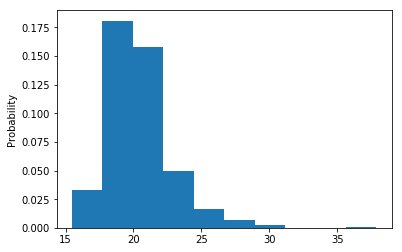

In [20]:
from matplotlib.pylab import *
hist(mc_results, density=True)  # From matplotlib package
ylabel("Probability")
print(mean(mc_results))
print(median(mc_results))
np.exp(mean(np.log(mc_results))) 
pd.DataFrame(mc_results).describe()  # Using the pandas package

In [21]:
df = pd.DataFrame(mc_results)
df.to_csv('MCsimulation_Att_model.csv', sep = ';')